# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Joshua Abbel Rakaditya]
- **Email:** [abbelciu@gmail.com]
- **ID Dicoding:** [Joshua Abbel Rakaditya]

## Menentukan Pertanyaan Bisnis

- Produk Apa yang Mendapatkan Penjualan Terbaik dan Terburuk?
- Kota Mana yang Memiliki Konsentrasi Pelanggan Terbesar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [3]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [5]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [6]:
product_category_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

**Insight:**
- Data-data diambil dari file csv pada folder data lalu memindahnya pada masing-masing variabel dengan nama unik sendiri.
- Beberapa data yang diperlukan saja yang akan diambil untuk menjawab pertanyaan bisnis. 

### Assessing Data

Menilai tabel *customer_df*

In [7]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Menilai tabel *orders_df*

In [9]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

Menilai tabel *order_items_df*

In [12]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

Menilai tabel *products_df*

In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [16]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

Menilai tabel *product_category_df*

In [17]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [18]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

**Insight:**
- Setiap dataset dinilai untuk dicek tipe data, *missing value*, dan adakah duplikasinya.
- Parameter statistik tiap dataset dicek menggunakan describe().

### Cleaning Data

1. Membersihkan tabel *orders_df*

- Mengambil order yang sudah diantar (*delivered*)

In [19]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [20]:
orders_df = orders_df[orders_df["order_status"] == "delivered"]

In [21]:
orders_df.order_status.value_counts()

order_status
delivered    96478
Name: count, dtype: int64

- Menghapus data yang kosong

In [22]:
orders_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [23]:
orders_df = orders_df.dropna(subset=["order_approved_at"])

In [24]:
orders_df = orders_df.dropna(subset=["order_delivered_carrier_date"])

In [25]:
orders_df = orders_df.dropna(subset=["order_delivered_customer_date"])

In [26]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

2. Membersihkan tabel *products_df*

- Menghapus data yang kosong

In [27]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [28]:
products_df[products_df.product_category_name.isna()]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

In [29]:
products_df[products_df.product_weight_g.isna()]

product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN

In [30]:
products_df = products_df.dropna(subset=["product_category_name"])

In [31]:
products_df = products_df.dropna(subset=["product_weight_g"])

In [32]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Dataset orders_df hanya mengambil *delivered* sesuai dengan pertanyaan pertama.
- Data yang kosong dicek dan dihapus agar tidak menimbulkan error nantinya. 

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [33]:
customers_df.sample(5)

customer_id                customer_unique_id  \
47019  29095dcf51e791e752d09a1f4b66cae2  88e36fbb8afdefa4140cfa61d523611c   
36813  b7594fafdd45711b75ec17b8d3585215  bcc613447f8ad78b10c2d4e3198b3151   
78552  ceac56c242d0cffbee3c4f5c3335388f  70e66494ff99908946e7d2cef02e76da   
27361  84cf34a198e8a9fd8e7187e16dd4be33  722c5d6a01508f1f38569b59120b20e9   
96129  d729159365c9d50643bfb026ffdbef04  caa1a53d52986e888322bcc60b71064d   

       customer_zip_code_prefix        customer_city customer_state  
47019                     12213  sao jose dos campos             SP  
36813                      8050            sao paulo             SP  
78552                     80730             curitiba             PR  
27361                      4632            sao paulo             SP  
96129                     12247  sao jose dos campos             SP

In [34]:
customers_df.describe(include="all")

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

In [35]:
customers_df.customer_id.is_unique

True

In [36]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

**Insight:**
- Dataset customers_df di explore agar jadi media pendukung dalam menjawab pertanyaan.
- customer_id diperiksa keunikanya karena menjadi patokan untuk penggabungan nantinya.

### Explore `orders_df`

In [37]:
orders_df.sample(5)

order_id                       customer_id  \
960    7e3f9f89f31e57c84fe4ef9a5bb9bc1e  87b5d2464401b73336fefb8b1e3b91c7   
96633  2ae6d828f4cf351ecb662a1f2c30aa93  f1a9c96003c11814dc06fbe8f0ceed08   
91357  4321bf26c064204859cdc39a9fd479ee  908265335da82f437cdbe86dc7b2b0eb   
68628  64b124e81c976cf11238b0bd8ae04aff  a36874062543a8fb71e68e85a85ca3ec   
21647  2e346f2848b0263dc1775fa2b5af2719  ce510a4d2db930a570c19134f75a80cf   

      order_status order_purchase_timestamp    order_approved_at  \
960      delivered      2017-08-26 12:43:02  2017-08-26 12:55:19   
96633    delivered      2018-05-07 17:50:10  2018-05-09 03:51:43   
91357    delivered      2017-11-05 23:05:51  2017-11-05 23:26:55   
68628    delivered      2017-06-03 18:50:13  2017-06-03 19:02:05   
21647    delivered      2018-06-23 07:13:25  2018-06-23 07:39:27   

      order_delivered_carrier_date order_delivered_customer_date  \
960            2017-08-30 20:26:55           2017-09-05 16:00:03   
96633          2018-05-09 10:09:00           2018-06-06 18:29:53   
91357          2017-11-08 21:32:03           2017-11-21 22:24:30   
68628          2017-06-05 10:47:40           2017-06-26 10:15:02   
21647          2018-06-26 15:59:00           2018-07-03 16:44:25   

      order_estimated_delivery_date  
960             2017-09-29 00:00:00  
96633           2018-05-30 00:00:00  
91357           2017-12-01 00:00:00  
68628           2017-07-10 00:00:00  
21647           2018-07-19 00:00:00

In [38]:
orders_df.describe(include="all")

order_id                       customer_id  \
count                              96455                             96455   
unique                             96455                             96455   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         96455                    96455                96455   
unique            1                    95933                88266   
top       delivered      2018-08-02 12:06:07  2018-02-27 04:31:10   
freq          96455                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         96455                         96455   
unique                        80094                         95643   
top             2018-05-09 15:48:00           2018-07-24 21:36:42   
freq                             47                             3   

       order_estimated_delivery_date  
count                          96455  
unique                           445  
top              2017-12-20 00:00:00  
freq                             507

In [39]:
orders_df.order_id.is_unique

True

**Insight:**
- Dataset orders_df di explore agar jadi media pendukung dalam menjawab pertanyaan.
- order_id diperiksa keunikanya karena menjadi patokan untuk penggabungan nantinya

### Explore `order_items_df`

In [40]:
order_items_df.sample(5)

order_id  order_item_id  \
36309   52577f39f9f27644903361597585d367              3   
18897   2b6f54b1e447bf7916396c36596c4e9e              1   
52225   76de574e14e58baded25a12dce8075c1              1   
110538  fb2aa32b042bc39e28a5d6ba5a37f51f              1   
12107   1b74651a2ec8ee2d9e115d444f07f019              1   

                              product_id                         seller_id  \
36309   cda185193c72c0eb8dde03f20f101230  febab0275244b9a49a623f0bd613ca2f   
18897   0c6ebd37c6842a5adbcd801030ec1c29  6edacfd9f9074789dad6d62ba7950b9c   
52225   4a9389b1a1ad7d52963f24ce0391a08f  6750d71153f00fc58829af2a8ef1bcf1   
110538  f4d705aa95ccca448e5b0deb6e5290ba  da8622b14eb17ae2831f4ac5b9dab84a   
12107   abb9de7600a7ae9a81564692f77fc9f3  537eb890efff034a88679788b647c564   

        shipping_limit_date  price  freight_value  
36309   2017-12-11 04:13:45   69.5          13.51  
18897   2018-02-27 16:15:45   99.9          14.45  
52225   2017-06-22 10:42:57   89.0          16.38  
110538  2017-11-20 14:30:52   24.9           9.09  
12107   2017-12-04 13:50:49   24.9          12.35

In [41]:
order_items_df.describe(include="all")

order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        shipping_limit_date          price  freight_value  
count                112650  112650.000000  112650.000000  
unique                93318            NaN            NaN  
top     2017-07-21 18:25:23            NaN            NaN  
freq                     21            NaN            NaN  
mean                    NaN     120.653739      19.990320  
std                     NaN     183.633928      15.806405  
min                     NaN       0.850000       0.000000  
25%                     NaN      39.900000      13.080000  
50%                     NaN      74.990000      16.260000  
75%                     NaN     134.900000      21.150000  
max                     NaN    6735.000000     409.680000

**Insight:**
- Dataset order_items_df di explore agar jadi media pendukung dalam menjawab pertanyaan.

### Explore `products_df`

In [42]:
products_df.sample(5)

product_id product_category_name  \
8232   3b123ae5d71b7b0d1b2a3f47c00eec8b          beleza_saude   
16056  60c4a6df513180268f7ee401b30f3c1b      eletrodomesticos   
10786  a98657f6c266c87a5477b593aa1b7a80         esporte_lazer   
24004  b7491cfca821bcb21fb9ddc21c76fc68            automotivo   
28448  2b80e83f77008f81ae402882631eba97             papelaria   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8232                  51.0                       612.0                 1.0   
16056                 57.0                       228.0                 1.0   
10786                 52.0                      1296.0                 1.0   
24004                 60.0                       126.0                 1.0   
28448                 53.0                       221.0                 3.0   

       product_weight_g  product_length_cm  product_height_cm  \
8232              338.0               21.0                6.0   
16056             350.0               33.0                3.0   
10786            1350.0               26.0               18.0   
24004             100.0               16.0                7.0   
28448             350.0               24.0                7.0   

       product_width_cm  
8232               21.0  
16056              36.0  
10786              18.0  
24004              11.0  
28448              14.0

In [43]:
products_df.describe(include="all")

product_id product_category_name  \
count                              32340                 32340   
unique                             32340                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32340.000000                32340.000000        32340.000000   
unique                  NaN                         NaN                 NaN   
top                     NaN                         NaN                 NaN   
freq                    NaN                         NaN                 NaN   
mean              48.476592                  771.492393            2.188961   
std               10.245699                  635.124831            1.736787   
min                5.000000                    4.000000            1.000000   
25%               42.000000                  339.000000            1.000000   
50%               51.000000                  595.000000            1.000000   
75%               57.000000                  972.000000            3.000000   
max               76.000000                 3992.000000           20.000000   

        product_weight_g  product_length_cm  product_height_cm  \
count       32340.000000       32340.000000       32340.000000   
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean         2276.956586          30.854545          16.958813   
std          4279.291845          16.955965          13.636115   
min             0.000000           7.000000           2.000000   
25%           300.000000          18.000000           8.000000   
50%           700.000000          25.000000          13.000000   
75%          1900.000000          38.000000          21.000000   
max         40425.000000         105.000000         105.000000   

        product_width_cm  
count       32340.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean           23.208596  
std            12.078762  
min             6.000000  
25%            15.000000  
50%            20.000000  
75%            30.000000  
max           118.000000

In [44]:
products_df.product_id.is_unique

True

**Insight:**
- Dataset products_df di explore agar jadi media pendukung dalam menjawab pertanyaan.
- products_df diperiksa keunikanya karena menjadi patokan untuk penggabungan nantinya.

### Explore `product_category_df`

In [45]:
product_category_df.sample(5)

product_category_name product_category_name_english
53                   pcs                     computers
0           beleza_saude                 health_beauty
42           moveis_sala         furniture_living_room
20                 audio                         audio
60            la_cuisine                    la_cuisine

In [46]:
product_category_df.describe(include="all")

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

In [47]:
product_category_df.product_category_name.is_unique

True

**Insight:**
- Dataset product_category_df di explore agar jadi media pendukung dalam menjawab pertanyaan.
- product_category_name diperiksa keunikanya karena menjadi patokan untuk penggabungan nantinya.

### Explore All

Menggabungkan data `orders_df` & `order_items_df` menggunakan *order_id*

In [48]:
delivered_order_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
delivered_order_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2018-08-13 00:00:00              1   
2           2018-09-04 00:00:00              1   
3           2017-12-15 00:00:00              1   
4           2018-02-26 00:00:00              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

   shipping_limit_date   price  freight_value  
0  2017-10-06 11:07:15   29.99           8.72  
1  2018-07-30 03:24:27  118.70          22.76  
2  2018-08-13 08:55:23  159.90          19.22  
3  2017-11-23 19:45:59   45.00          27.20  
4  2018-02-19 20:31:37   19.90           8.72

Menggabungkan data `delivered_order_df` & `products_df` menggunakan *product_id*

In [49]:
order_product_df = pd.merge(
    left=delivered_order_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_product_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2018-08-13 00:00:00              1   
2           2018-09-04 00:00:00              1   
3           2017-12-15 00:00:00              1   
4           2018-02-26 00:00:00              1   

                         product_id  ...   price freight_value  \
0  87285b34884572647811a353c7ac498a  ...   29.99          8.72   
1  595fac2a385ac33a80bd5114aec74eb8  ...  118.70         22.76   
2  aa4383b373c6aca5d8797843e5594415  ...  159.90         19.22   
3  d0b61bfb1de832b15ba9d266ca96e5b0  ...   45.00         27.20   
4  65266b2da20d04dbe00c5c2d3bb7859e  ...   19.90          8.72   

   product_category_name  product_name_lenght product_description_lenght  \
0  utilidades_domesticas                 40.0                      268.0   
1             perfumaria                 29.0                      178.0   
2             automotivo                 46.0                      232.0   
3               pet_shop                 59.0                      468.0   
4              papelaria                 38.0                      316.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             500.0               19.0                8.0   
1                 1.0             400.0               19.0               13.0   
2                 1.0             420.0               24.0               19.0   
3                 3.0             450.0               30.0               10.0   
4                 4.0             250.0               51.0               15.0   

   product_width_cm  
0              13.0  
1              19.0  
2              21.0  
3              20.0  
4              15.0  

[5 rows x 22 columns]

Menggabungkan data `order_product_df` & `product_category_df` menggunakan *product_category_name*

In [50]:
final_product_df = pd.merge(
    left=order_product_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
final_product_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2018-08-13 00:00:00              1   
2           2018-09-04 00:00:00              1   
3           2017-12-15 00:00:00              1   
4           2018-02-26 00:00:00              1   

                         product_id  ... freight_value  product_category_name  \
0  87285b34884572647811a353c7ac498a  ...          8.72  utilidades_domesticas   
1  595fac2a385ac33a80bd5114aec74eb8  ...         22.76             perfumaria   
2  aa4383b373c6aca5d8797843e5594415  ...         19.22             automotivo   
3  d0b61bfb1de832b15ba9d266ca96e5b0  ...         27.20               pet_shop   
4  65266b2da20d04dbe00c5c2d3bb7859e  ...          8.72              papelaria   

   product_name_lenght  product_description_lenght product_photos_qty  \
0                 40.0                       268.0                4.0   
1                 29.0                       178.0                1.0   
2                 46.0                       232.0                1.0   
3                 59.0                       468.0                3.0   
4                 38.0                       316.0                4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             400.0               19.0               13.0              19.0   
2             420.0               24.0               19.0              21.0   
3             450.0               30.0               10.0              20.0   
4             250.0               51.0               15.0              15.0   

   product_category_name_english  
0                     housewares  
1                      perfumery  
2                           auto  
3                       pet_shop  
4                     stationery  

[5 rows x 23 columns]

Menggabungkan data `final_product_df` & `customer_df` menggunakan *customer_id*

In [51]:
all_df = pd.merge(
    left=final_product_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
all_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2018-08-13 00:00:00              1   
2           2018-09-04 00:00:00              1   
3           2017-12-15 00:00:00              1   
4           2018-02-26 00:00:00              1   

                         product_id  ... product_photos_qty product_weight_g  \
0  87285b34884572647811a353c7ac498a  ...                4.0            500.0   
1  595fac2a385ac33a80bd5114aec74eb8  ...                1.0            400.0   
2  aa4383b373c6aca5d8797843e5594415  ...                1.0            420.0   
3  d0b61bfb1de832b15ba9d266ca96e5b0  ...                3.0            450.0   
4  65266b2da20d04dbe00c5c2d3bb7859e  ...                4.0            250.0   

   product_length_cm  product_height_cm product_width_cm  \
0               19.0                8.0             13.0   
1               19.0               13.0             19.0   
2               24.0               19.0             21.0   
3               30.0               10.0             20.0   
4               51.0               15.0             15.0   

   product_category_name_english                customer_unique_id  \
0                     housewares  7c396fd4830fd04220f754e42b4e5bff   
1                      perfumery  af07308b275d755c9edb36a90c618231   
2                           auto  3a653a41f6f9fc3d2a113cf8398680e8   
3                       pet_shop  7c142cf63193a1473d2e66489a9ae977   
4                     stationery  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city  customer_state  
0                      3149                sao paulo              SP  
1                     47813                barreiras              BA  
2                     75265               vianopolis              GO  
3                     59296  sao goncalo do amarante              RN  
4                      9195              santo andre              SP  

[5 rows x 27 columns]

In [52]:
# all_df.to_csv("all_data.csv", index=False)

**Insight:**
- EDA diatas hanya berfokus pada penggabungan dataset menjadi satu untuk visualisasi data.
- Kolom terakhir berguna untuk menyimpan data, hapus tanda # agar dapat bekerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk Apa yang Mendapatkan Penjualan Terbaik dan Terburuk?

In [53]:
sum_product_df = all_df.groupby("product_category_name_english")["order_item_id"].count().reset_index().sort_values(by="order_item_id", ascending=False)
sum_product_df.head(5)

product_category_name_english  order_item_id
7                 bed_bath_table          10952
43                 health_beauty           9465
65                sports_leisure           8428
39               furniture_decor           8156
15         computers_accessories           7643

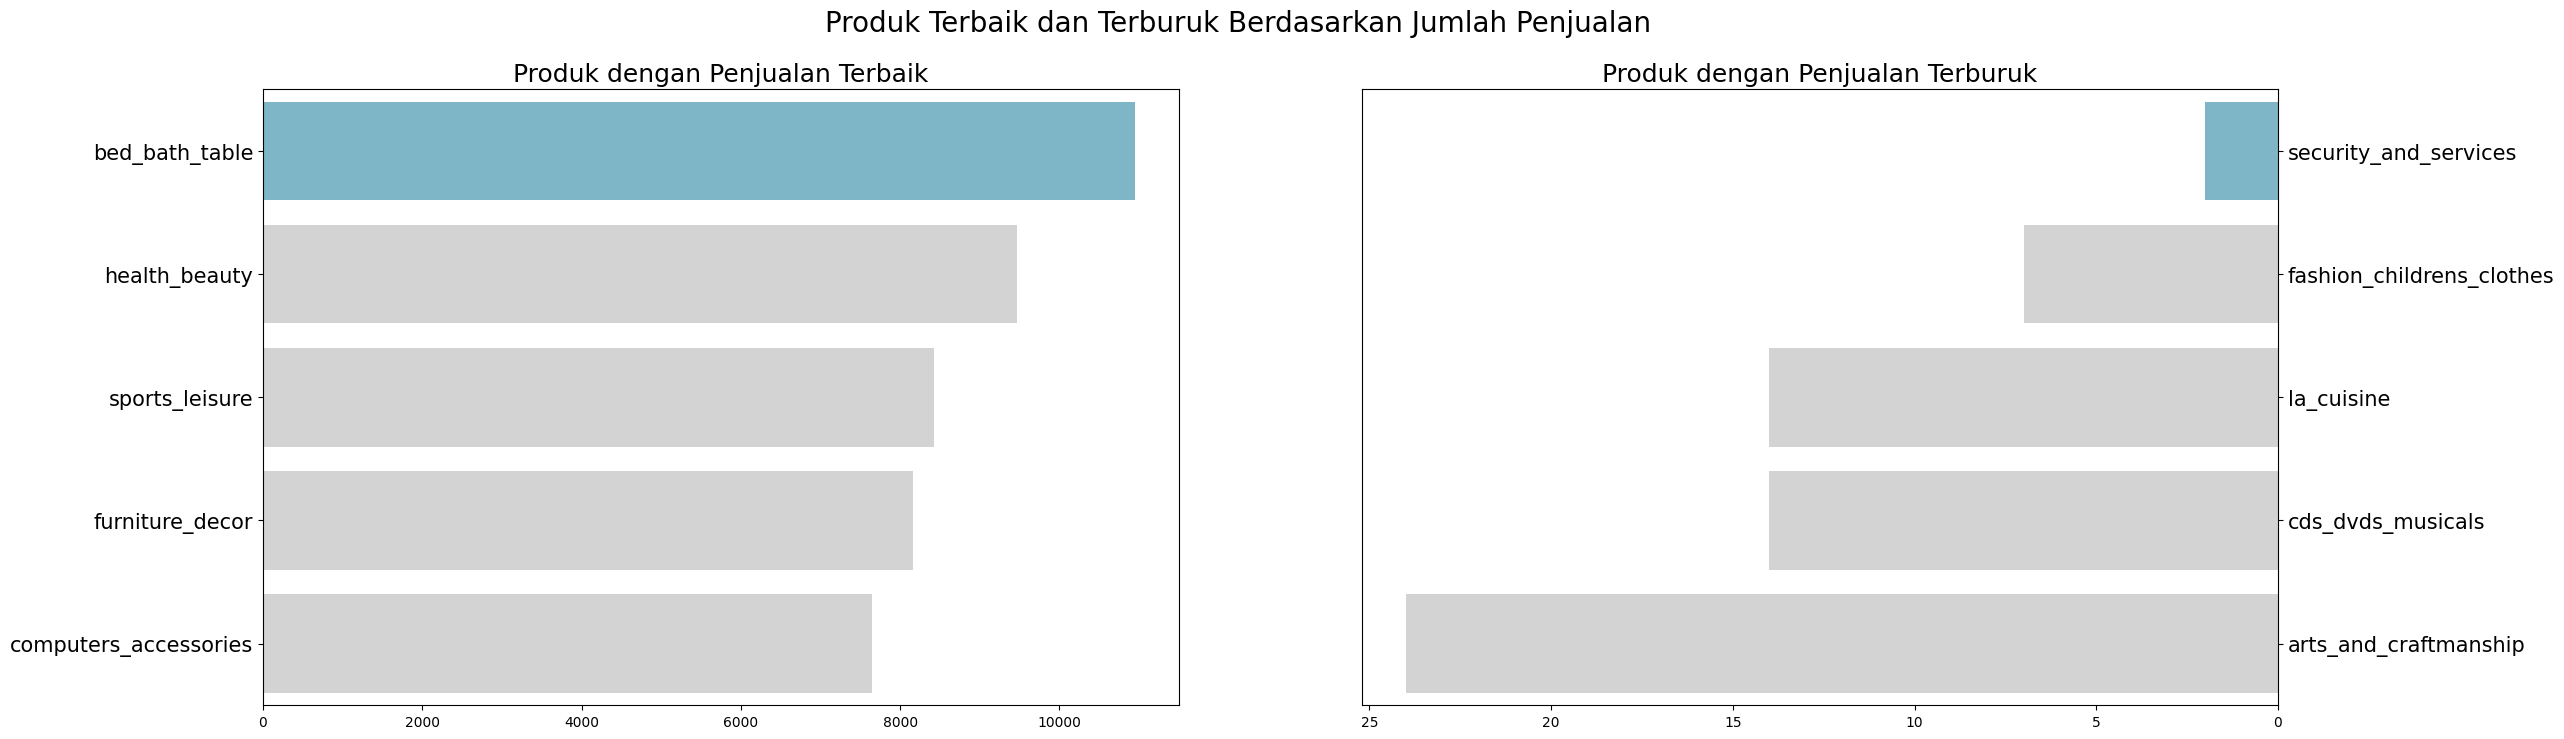

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(26, 8))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="order_item_id",
    y="product_category_name_english",
    data=sum_product_df.head(5),
    palette=colors, ax=ax[0],
    hue="product_category_name_english",
    legend=False
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan Penjualan Terbaik", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(
    x="order_item_id",
    y="product_category_name_english",
    data=sum_product_df.sort_values(by="order_item_id", ascending=True).head(5),
    palette=colors, ax=ax[1],
    hue="product_category_name_english",
    legend=False
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Penjualan Terburuk", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk Terbaik dan Terburuk Berdasarkan Jumlah Penjualan", fontsize=20)
plt.show()

### Pertanyaan 2: Kota Mana yang Memiliki Konsentrasi Pelanggan Terbesar?

In [55]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index().sort_values(by="customer_id", ascending=False)
bycity_df.rename(columns={"customer_id": "customer_count"}, inplace=True)
bycity_df.head(7)

customer_city  customer_count
3563       sao paulo           15043
3126  rio de janeiro            6600
449   belo horizonte            2697
553         brasilia            2071
1135        curitiba            1489
700         campinas            1406
2936    porto alegre            1341

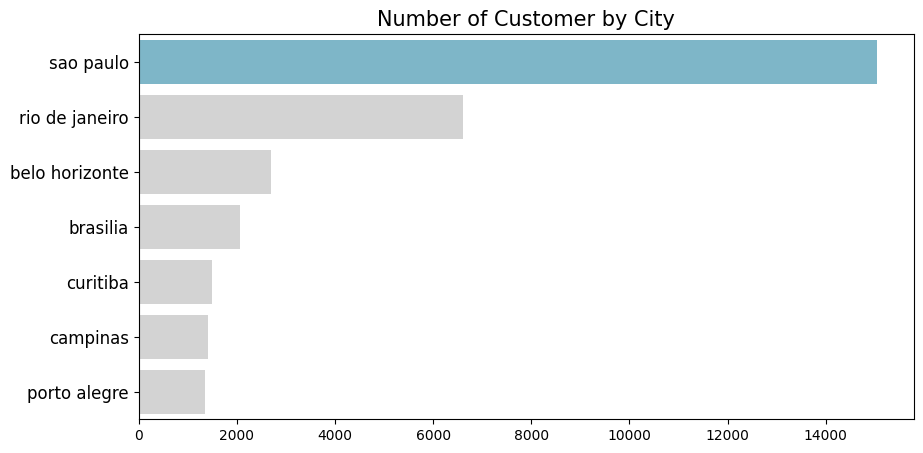

In [56]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=bycity_df.head(7).sort_values(by="customer_count", ascending=False),
    palette=colors_,
    hue="customer_city",
    legend=False
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Produk dengan penjualan terbaik adalah **bed_bath_table** dan terburuknya adalah **security_and_services**
- Kota yang memiliki konsentrasi pelanggan terbesar adalah **Sao Paulo**

## Conclusion

- Produk berkategori **bed_bath_table** memiliki penjualan tertinggi melebihi 10.000, sedangkan **security_and_services** menjadi kategori produk dengan penjualan terendah. Dengan berfokus pada hasil ini, strategi pemasaran dapat ditingkatkan dan evaluasi produk juga dapat dilakukan.
- Kota **Sao Paulo** memiliki jumlah pelanggan terbesar membuatnya jadi pasar utama bagi perusahaan dan pertumbuhan ekonomi yang signifikan. Namun kota-kota lain terlihat jauh nilainya, menjadikan suatu dorongan untuk melakukan pemasaran yang lebih kuat.